Let's test things out on a single target: K2-33

In [15]:
age = 7 #Myr
distance = 142.8 #pc
spt = "A2V"
kmag = 10.1

In [16]:
#First let's try to get the JWST mag in a given filter

In [17]:
from jwst import *

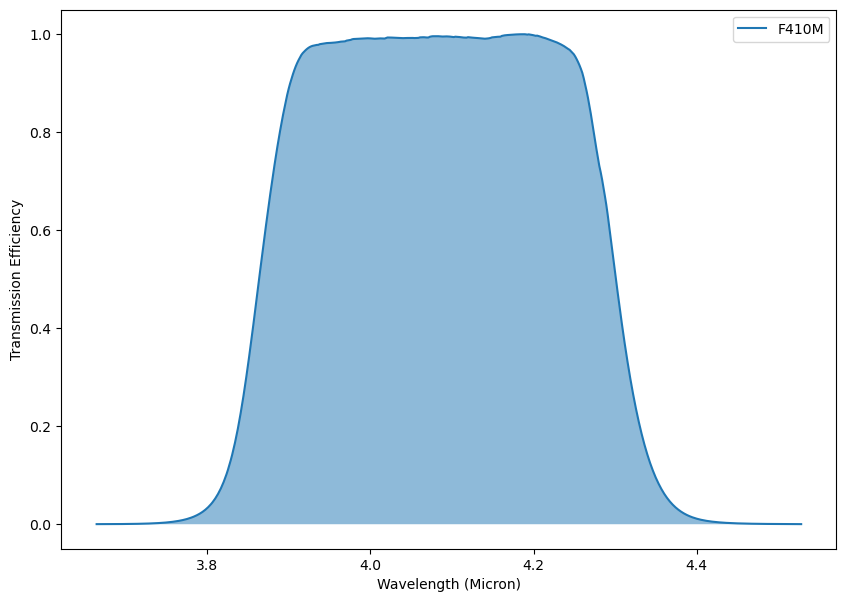

In [18]:
instrument='nircam'
instrument_mask = 'mask335r'
jwst_filt = 'f410m'
tst1, tst2 = get_jwst_mag(spt,kmag,instrument,jwst_filt,filter_dir="./",jwst_mask=instrument_mask,plot=True,
                norm_filter='bessel_k')

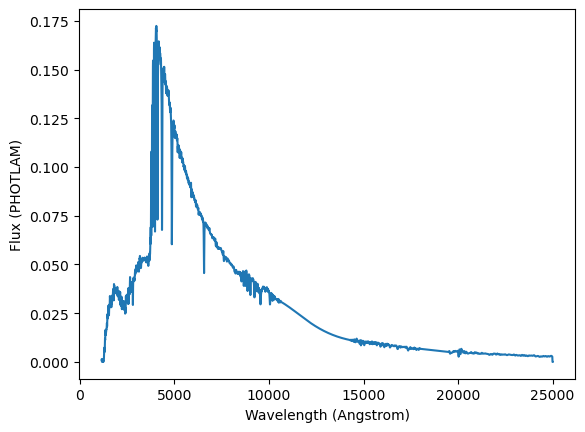

In [19]:
tst1.plot()

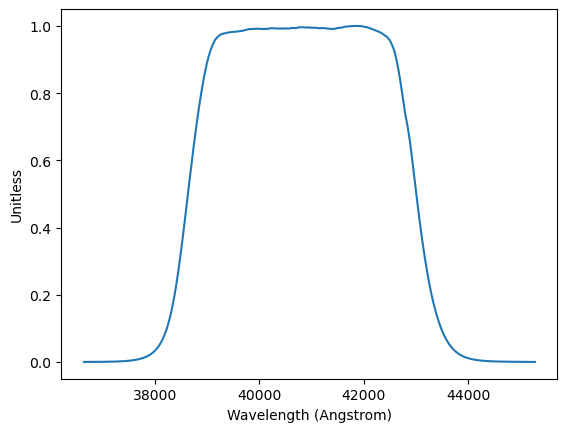

In [9]:
tst2.plot()

In [20]:
import poppy

/Users/maxwellmb/Anaconda3/anaconda3/lib/python3.7/site-packages/pysynphot-0.9.14-py3.7-macosx-10.7-x86_64.egg/pysynphot/locations.py:346: UserWarning: Extinction files not found in /Users/maxwellmb/Dropbox (Personal)/Library/pysynphot/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [22]:
test4 = poppy.specFromSpectralType('M2V')

In [23]:
test4.plot()

AttributeError: 'Icat' object has no attribute 'plot'